# RESIDENTIAL POWER CONSUMPTION

## Data

In [1]:
# Import all the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [2]:
power_usage = pd.read_csv('power_usage_2016_to_2020.csv')
weather = pd.read_csv('weather_2016_2020_daily.csv')

### Data preprocessing

In [138]:
power_usage.head(25)

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday
5,2016-01-06 05:00:00,0.333,2,weekday
6,2016-01-06 06:00:00,0.462,2,weekday
7,2016-01-06 07:00:00,0.493,2,weekday
8,2016-01-06 08:00:00,0.325,2,weekday
9,2016-01-06 09:00:00,0.294,2,weekday


The actual StartDate of data is from 2016-06-01(yyyy-mm-dd). In the dataset the dates are not properly formated. In the following steps the StartDate column is formated properly.

In [3]:
m = power_usage.shape[0]
power_usage_date = pd.Series(range(m), pd.period_range('2016-06-01 00:00:00', freq = '1H', periods = m))
power_usage['StartDate'] = power_usage_date.to_frame().index

In [140]:
power_usage.head(25)

,StartDate,Value (kWh),day_of_week,notes
0,2016-06-01 00:00,1.057,2,weekday
1,2016-06-01 01:00,1.171,2,weekday
2,2016-06-01 02:00,0.560,2,weekday
3,2016-06-01 03:00,0.828,2,weekday
4,2016-06-01 04:00,0.932,2,weekday
5,2016-06-01 05:00,0.333,2,weekday
6,2016-06-01 06:00,0.462,2,weekday
7,2016-06-01 07:00,0.493,2,weekday
8,2016-06-01 08:00,0.325,2,weekday
9,2016-06-01 09:00,0.294,2,weekday


In [4]:
power_usage.rename(columns={'Value (kWh)' : 'Value'}, inplace=True)

In [141]:
weather.head()

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [5]:
m = weather.shape[0] 
weather_date = pd.Series(range(m), pd.period_range('2016-06-01', freq = '1D', periods = m))
weather['Date'] = weather_date.to_frame().index

In [143]:
weather.head()

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-06-01,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-06-02,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-06-03,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-06-04,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-06-05,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [144]:
print(power_usage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   StartDate    35952 non-null  period[H]
 1   Value (kWh)  35952 non-null  float64  
 2   day_of_week  35952 non-null  int64    
 3   notes        35952 non-null  object   
dtypes: float64(1), int64(1), object(1), period[H](1)
memory usage: 1.1+ MB
None


In [145]:
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   Date         1552 non-null   period[D]
 1   Day          1552 non-null   int64    
 2   Temp_max     1552 non-null   int64    
 3   Temp_avg     1552 non-null   float64  
 4   Temp_min     1552 non-null   int64    
 5   Dew_max      1552 non-null   int64    
 6   Dew_avg      1552 non-null   float64  
 7   Dew_min      1552 non-null   int64    
 8   Hum_max      1552 non-null   int64    
 9   Hum_avg      1552 non-null   float64  
 10  Hum_min      1552 non-null   int64    
 11  Wind_max     1552 non-null   int64    
 12  Wind_avg     1552 non-null   float64  
 13  Wind_min     1552 non-null   int64    
 14  Press_max    1552 non-null   float64  
 15  Press_avg    1552 non-null   float64  
 16  Press_min    1552 non-null   float64  
 17  Precipit     1552 non-null   float64  
 18  day_of_w

In [146]:
power_usage.describe()

,Value (kWh),day_of_week
count,35952.000000,35952.000000
mean,0.891631,2.997330
std,0.908133,1.999024
min,0.064000,0.000000
25%,0.323750,1.000000
50%,0.501000,3.000000
75%,1.072000,5.000000
max,6.446000,6.000000


In [147]:
weather.describe()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,15.726160,81.287371,71.752320,63.338273,66.615335,62.147423,56.939433,92.566366,74.365786,51.204897,15.855026,7.734987,1.375000,29.973840,29.903479,29.813273,0.157893,2.996134
std,8.800483,12.723409,12.490526,13.614699,12.279397,13.626795,15.246868,7.658203,11.700804,15.601436,4.842882,2.989969,2.500516,0.165958,0.160434,0.773583,0.658309,1.999029
min,1.000000,34.000000,27.600000,0.000000,18.000000,13.200000,0.000000,50.000000,31.500000,0.000000,6.000000,1.600000,0.000000,29.500000,28.800000,0.000000,0.000000,0.000000
25%,8.000000,74.000000,63.175000,52.750000,61.000000,54.075000,45.750000,90.000000,67.400000,41.000000,13.000000,5.700000,0.000000,29.900000,29.800000,29.700000,0.000000,1.000000
50%,16.000000,84.000000,74.300000,67.000000,70.000000,66.600000,62.000000,94.000000,75.000000,50.000000,15.000000,7.300000,0.000000,29.900000,29.900000,29.800000,0.000000,3.000000
75%,23.000000,92.000000,82.000000,75.000000,76.000000,73.400000,70.000000,97.000000,82.700000,61.000000,18.000000,9.400000,3.000000,30.100000,30.000000,29.900000,0.020000,5.000000
max,31.000000,101.000000,90.000000,83.000000,83.000000,79.800000,78.000000,100.000000,99.900000,97.000000,39.000000,23.900000,17.000000,30.600000,30.600000,30.500000,13.430000,6.000000


In [148]:
power_usage.notes.unique()

array(['weekday', 'weekend', 'vacation', 'COVID_lockdown'], dtype=object)

### Merge Datasets

For the purpose of merging Datasets we can split the StartDate to Date and Hour columns.

In [6]:
for idx, date in power_usage.iterrows():
    power_usage.loc[idx, 'Date'] = power_usage.StartDate[idx].strftime('%Y-%m-%d')
    power_usage.loc[idx, 'Hour'] = power_usage.StartDate[idx].strftime('%H:%M')

power_usage.drop(['StartDate'], inplace=True, axis = 1)


weather_date = []
for idx, date in weather.iterrows():
    weather_date.append(weather.Date[idx].strftime('%Y-%m-%d'))
weather.Date = weather_date

In [7]:
df_main  = power_usage.merge(weather,  on = ['Date', 'day_of_week'])

In [8]:
print(f"Shape of main table is {df_main.shape}")
print(f"Shape of power_usage table is {power_usage.shape}")
print(f"Shape of weather table is {weather.shape}")

Shape of main table is (35952, 22)
Shape of power_usage table is (35952, 5)
Shape of weather table is (1552, 19)


In [162]:
df_main.head()

,Value (kWh),day_of_week,notes,Date,Hour,Day,Temp_max,Temp_avg,Temp_min,Dew_max,...,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
0,1.057,2,weekday,2016-06-01,00:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0
1,1.171,2,weekday,2016-06-01,01:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0
2,0.560,2,weekday,2016-06-01,02:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0
3,0.828,2,weekday,2016-06-01,03:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0
4,0.932,2,weekday,2016-06-01,04:00,1,85,74.8,68,74,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0


## Exploratory data analysis

Let us analyse the features of table

In [62]:
df_main.head()

,Value,day_of_week,notes,Hour,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,...,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,year,month
0,1.057,2,weekday,00:00,1,85,74.8,68,74,71.4,...,65,21,9.5,0,29.8,29.8,29.7,0.0,2016,06
1,1.171,2,weekday,01:00,1,85,74.8,68,74,71.4,...,65,21,9.5,0,29.8,29.8,29.7,0.0,2016,06
2,0.560,2,weekday,02:00,1,85,74.8,68,74,71.4,...,65,21,9.5,0,29.8,29.8,29.7,0.0,2016,06
3,0.828,2,weekday,03:00,1,85,74.8,68,74,71.4,...,65,21,9.5,0,29.8,29.8,29.7,0.0,2016,06
4,0.932,2,weekday,04:00,1,85,74.8,68,74,71.4,...,65,21,9.5,0,29.8,29.8,29.7,0.0,2016,06


For better use of data , we can split Date into year, month, day columns. Since day column is laready in the dataframe, we might just add year and month column.

In [61]:
df_main['year'] = df_main.Date.str.split('-', expand=True)[0]
df_main['month'] = df_main.Date.str.split('-', expand=True)[1]
df_main.drop(columns = ['Date'], inplace = True)

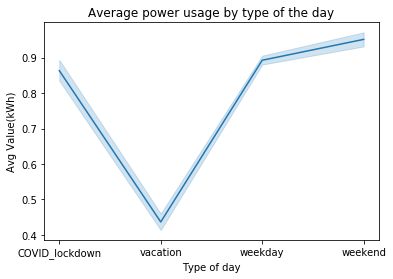

In [11]:
tod = sns.lineplot('notes', 'Value', data=df_main)
plt.xlabel('Type of day')
plt.ylabel('Avg Value(kWh)')
plt.title('Average power usage by type of the day')
#tod.get_figure().savefig("tod.png")

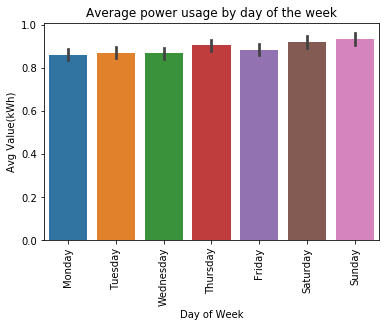

In [11]:
dow = sns.barplot('day_of_week', 'Value', data=df_main)
dow.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week')
plt.ylabel('Avg Value(kWh)')
plt.title('Average power usage by day of the week')
plt.xticks(rotation = 90)
#dow.get_figure().savefig("dow.png")

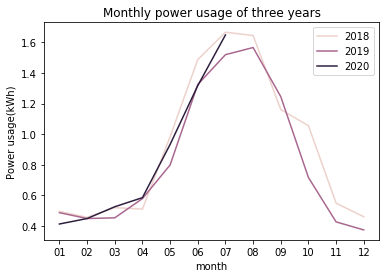

In [82]:
sns.lineplot(x = 'month', y = 'Value', data=df_main[df_main.year.astype(int) >= 2018], hue = 'year', ci = None)
plt.legend(labels = ['2018', '2019', '2020'])
plt.title('Monthly power usage of three years')
plt.ylabel('Power usage(kWh)')
#plt.savefig("monthly_power.png")

## Data Modelling

### Split Data

In [115]:
from sklearn.linear_model import LinearRegression

# Pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [100]:
X_train, X_test,y_train , y_test = train_test_split(df_main.drop(columns=['Value']), df_main.Value, test_size = .2, stratify= df_main.notes, random_state =42, shuffle=True)

In [101]:
print(f"Train data shape is {X_train.shape}")
print(f"Test data shape is {X_test.shape}")

Train data shape is (28761, 22)
Test data shape is (7191, 22)


In [107]:
df_main.columns

Index(['Value', 'day_of_week', 'notes', 'Hour', 'Day', 'Temp_max', 'Temp_avg',
       'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg',
       'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg',
       'Press_min', 'Precipit', 'year', 'month'],
      dtype='object')

In [110]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [111]:
cat_features = ['day_of_week', 'notes', 'Hour', 'Day', 'year', 'month']
num_features = ['Temp_max', 'Temp_avg',
       'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg',
       'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg',
       'Press_min', 'Precipit']



In [118]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_features)),
        ('std_scaler', StandardScaler()),
    ])

# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_features)),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

# Union the transformed, scaled numeric and categorical features.
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [119]:
lin_reg = LinearRegression()
np.random.seed(42)

baseline_pipeline = Pipeline([
    ('preperation', data_prep_pipeline),
    ('baseline_linreg', lin_reg)
])

In [125]:
cv15Splits = ShuffleSplit(n_splits=15, test_size=0.3, random_state=0)

In [126]:

baseline_pipeline.fit(X_train, y_train)
np.random.seed(42)

lin_scores = cross_val_score(baseline_pipeline, X_train, y_train, cv=cv15Splits)
                               
lin_score_train = lin_scores.mean()

# Time and score test predictions

lin_score_test  = baseline_pipeline.score(X_test, y_test)


In [133]:
results = pd.DataFrame(columns=["ExpID", 
              "Train Acc","Test Acc"])

In [134]:
results.loc[0] = ["Baseline", 
                  np.round(lin_score_train,4), np.round(lin_score_test,4)]

pd.set_option('display.max_colwidth', None)
results

,ExpID,Train Acc,Test Acc
0,Baseline,0.443,0.446


0.4430455704694